# Direction 2

### Importing the libraries

In [19]:
# import packages
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visualization


### Data preprocessing

In [20]:
# loading the csv file
df = pd.read_csv('./CVD_cleaned.csv', header=0)

In [21]:
# displaying the first few rows
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [22]:
# checking the data tpyes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [23]:
# Checking for null/missing values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [24]:
# filtering patients with heart disease
df_heart = df[df['Heart_Disease'] == 'Yes']
df_heart.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
10,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Female,75-79,160.0,74.84,29.23,No,0.0,30.0,20.0,2.0
11,Fair,Within the past year,No,Yes,Yes,No,No,Yes,No,Male,75-79,175.0,73.48,23.92,No,0.0,2.0,8.0,30.0


### Visualization

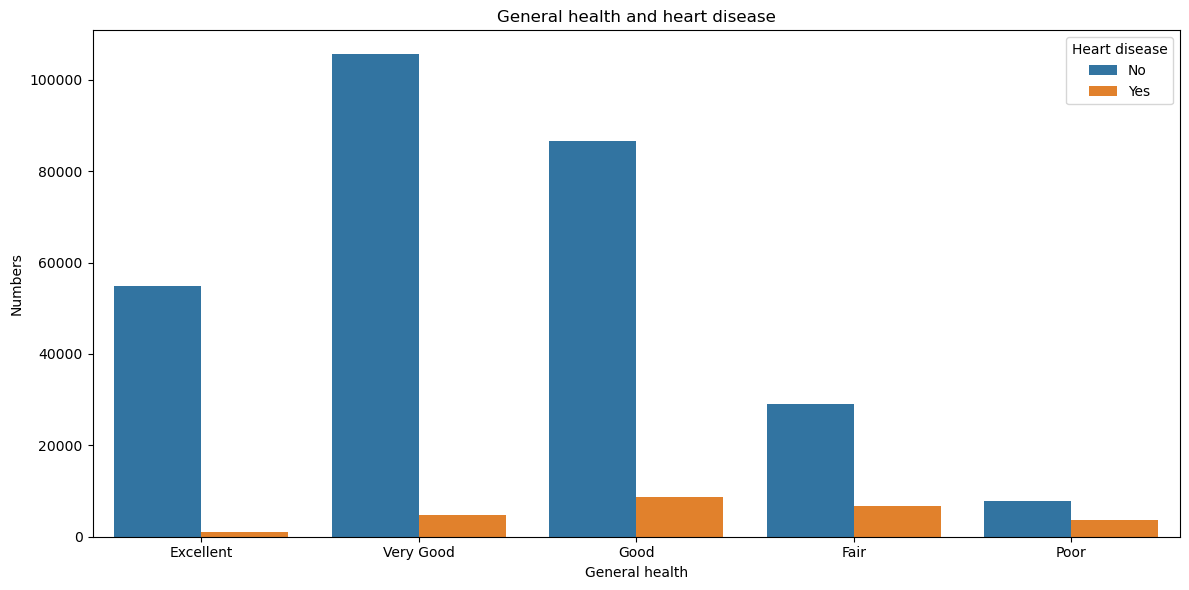

In [25]:
# general health and heart disease
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='General_Health', hue='Heart_Disease', order=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.title('General health and heart disease')
plt.xlabel('General health')
plt.ylabel('Numbers')
plt.legend(title='Heart disease')
plt.tight_layout()
plt.savefig('./general_health_heart.png', dpi=400, bbox_inches='tight')
plt.show()

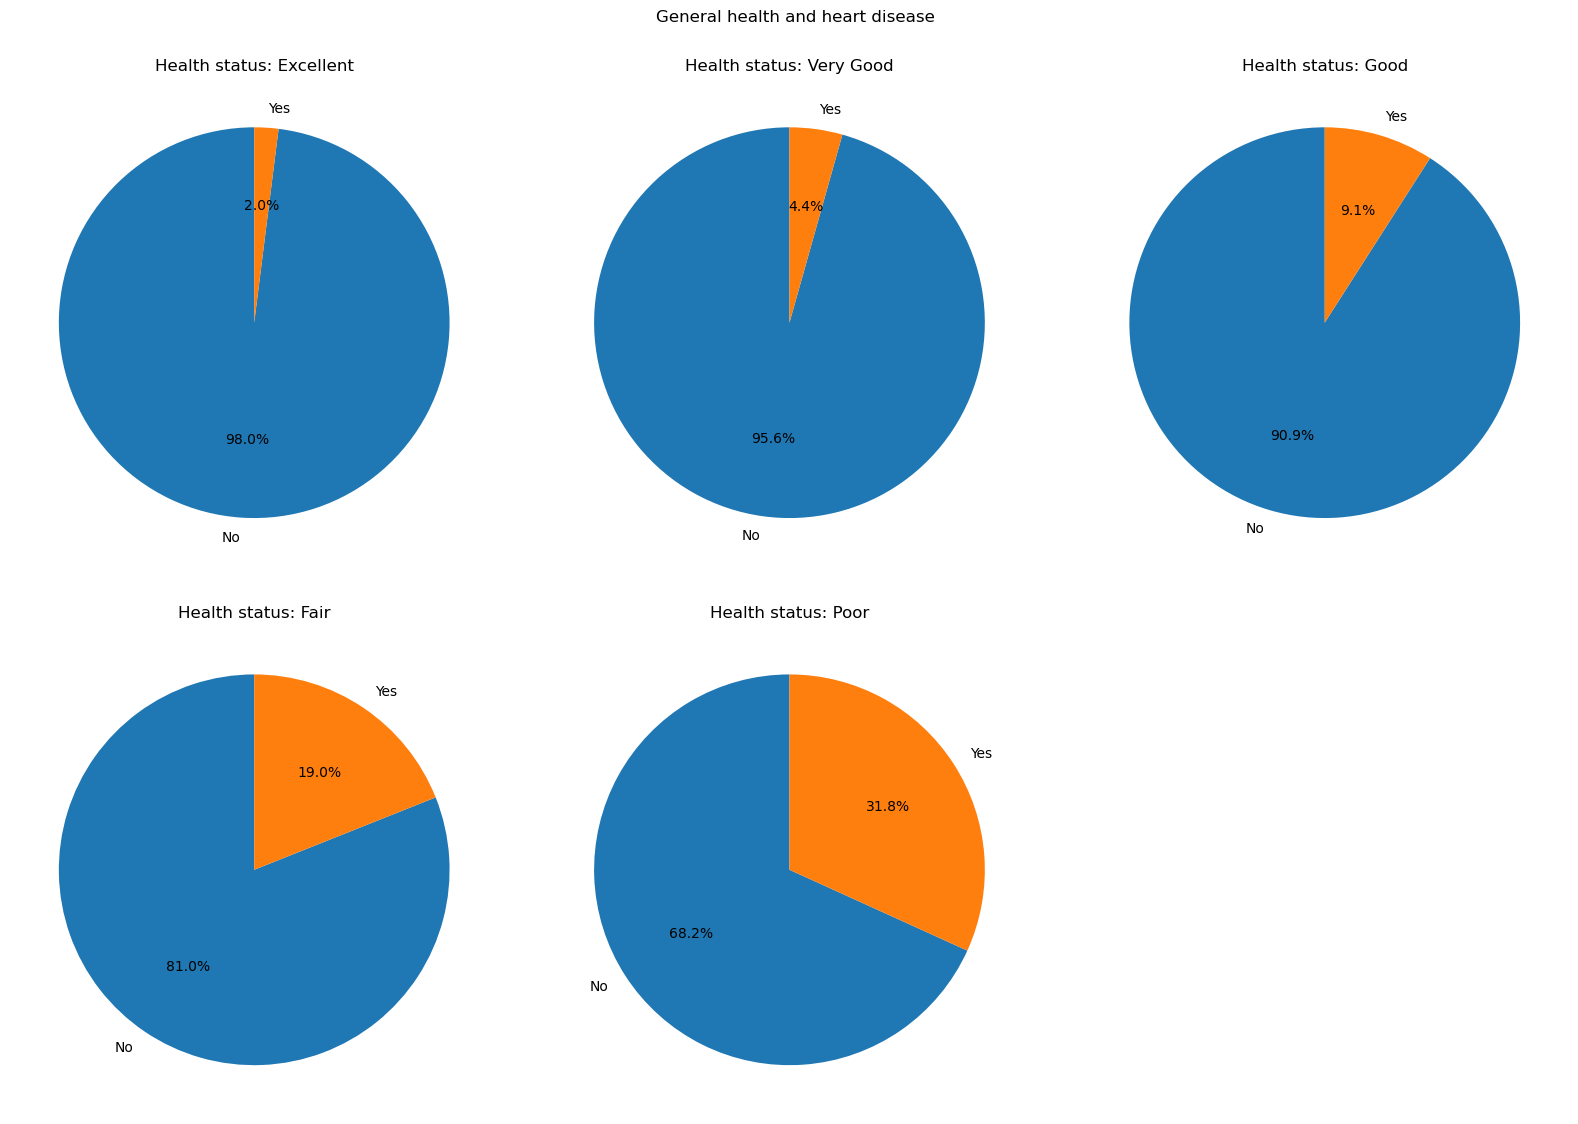

In [26]:
# general health and heart disease
df_health_heart = df[['General_Health', 'Heart_Disease']]
general_health = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
for i, health in enumerate(general_health):
    row, col = divmod(i, 3)

    health_df = df_health_heart[df_health_heart['General_Health'] == health]
    heart_counts = health_df['Heart_Disease'].value_counts()

    ax[row,col].pie(heart_counts, labels=heart_counts.index, autopct='%1.1f%%', startangle=90)
    ax[row,col].set_title(f'Health status: {health}')
fig.suptitle('General health and heart disease')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
ax[1,2].remove()
fig.savefig('health_heart_pie.png', dpi=400, bbox_inches='tight')
plt.show()

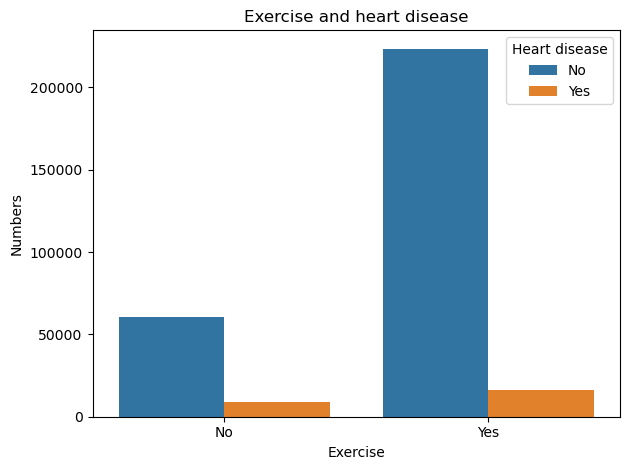

In [27]:
# exercise and heart disease
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease')
plt.title('Exercise and heart disease')
plt.legend(title='Heart disease')
plt.ylabel('Numbers')
plt.tight_layout()
plt.savefig('./exercise_heart.png', dpi=400, bbox_inches='tight')
plt.show()

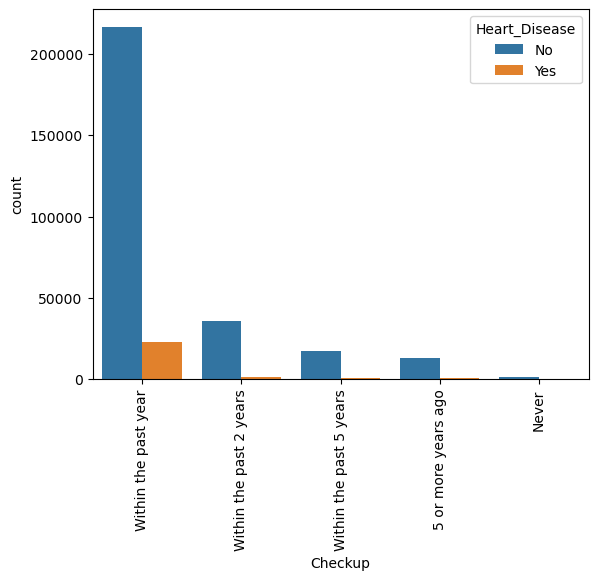

In [28]:
# checkup and heart disease
checkup_order = ['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']

sns.countplot(data=df, x='Checkup', hue='Heart_Disease', order=checkup_order)
plt.xticks(rotation=90)
plt.savefig('./checkup_heart.png', dpi=400, bbox_inches='tight')
plt.show()

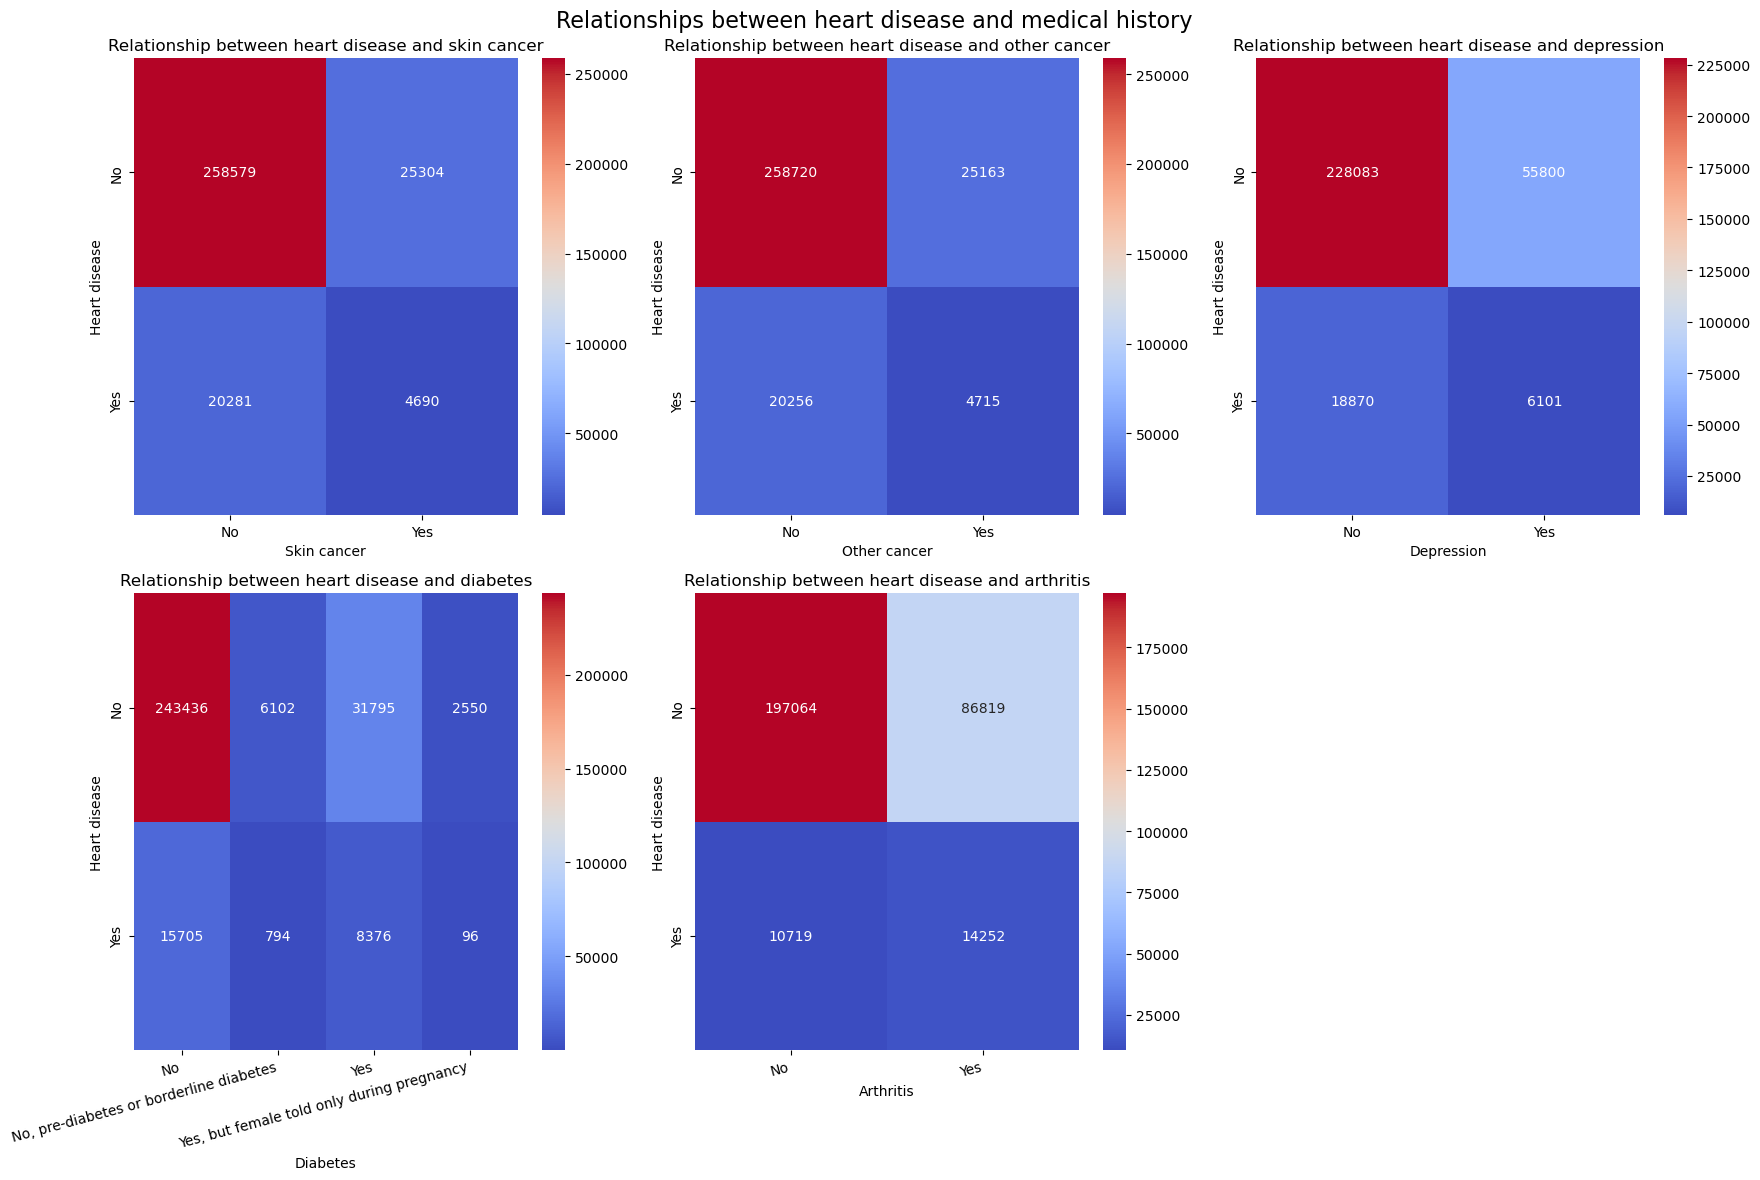

In [31]:
# the relationship between heart disease and medical  history
med_heart = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']
df_med_heart = df[med_heart]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, condition in enumerate(med_heart[1:]):
    row, col = divmod(i, 3)
    ct_med = pd.crosstab(df_med_heart['Heart_Disease'], df_med_heart[condition])

    sns.heatmap(ct_med, annot=True, cmap='coolwarm', fmt='d', cbar_kws={'format': '%.0f'}, ax=axes[row, col])
    axes[row, col].set_title(f'Relationship between heart disease and {condition.replace("_", " ").lower()}')
    axes[row, col].set_xlabel(condition.replace("_", " ").capitalize())
    axes[row, col].set_ylabel('Heart disease')

axes[1, 1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=15, ha='right')
fig.suptitle('Relationships between heart disease and medical history', fontsize=16)
axes[1, 0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=15, ha='right')
plt.tight_layout()
axes[1,2].remove()
fig.savefig('./heart_med.png', dpi=400, bbox_inches='tight')
plt.show()

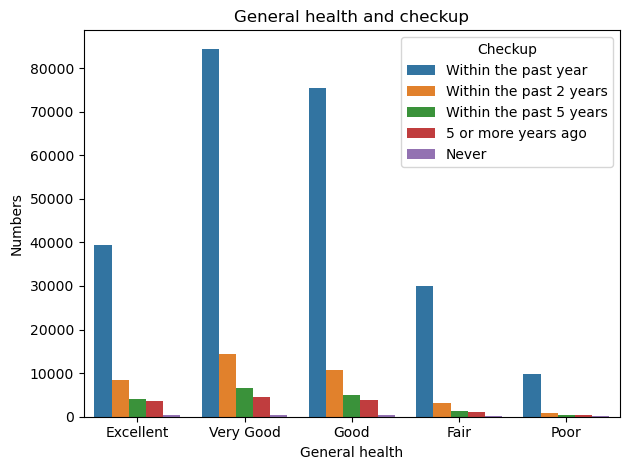

In [29]:
# general health and checkup
sns.countplot(x='General_Health', data=df, hue='Checkup', hue_order=checkup_order, order=general_health)
plt.xlabel('General health')
plt.ylabel('Numbers')
plt.title('General health and checkup')
plt.tight_layout()
plt.savefig('./health_checkup.png', dpi=400, bbox_inches='tight')
plt.show()

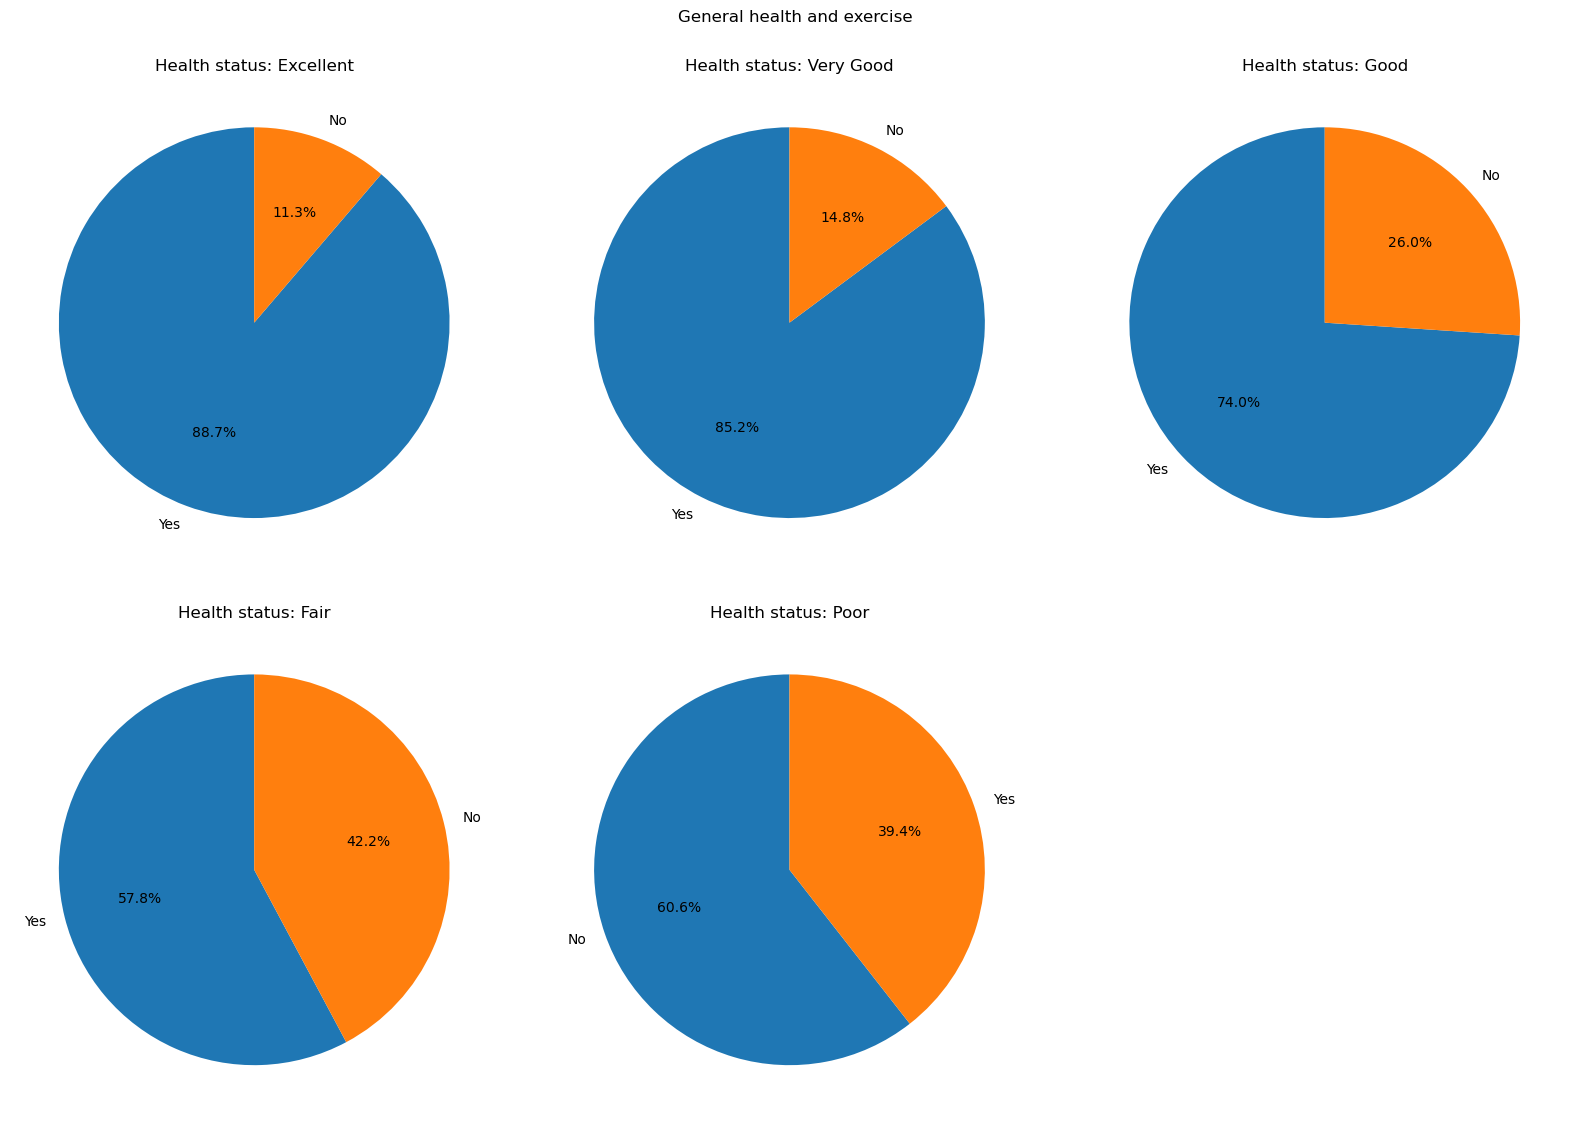

In [30]:
# general health and heart disease
df_health_ex = df[['General_Health', 'Exercise']]

fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
for i, health in enumerate(general_health):
    row, col = divmod(i, 3)

    health_df = df_health_ex[df_health_ex['General_Health'] == health]
    ex_counts = health_df['Exercise'].value_counts()

    ax[row,col].pie(ex_counts, labels=ex_counts.index, autopct='%1.1f%%', startangle=90)
    ax[row,col].set_title(f'Health status: {health}')
fig.suptitle('General health and exercise')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
ax[1,2].remove()
fig.savefig('./health_ex.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\xyche\AppData\Local\Temp\ipykernel_22040\4020263051.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


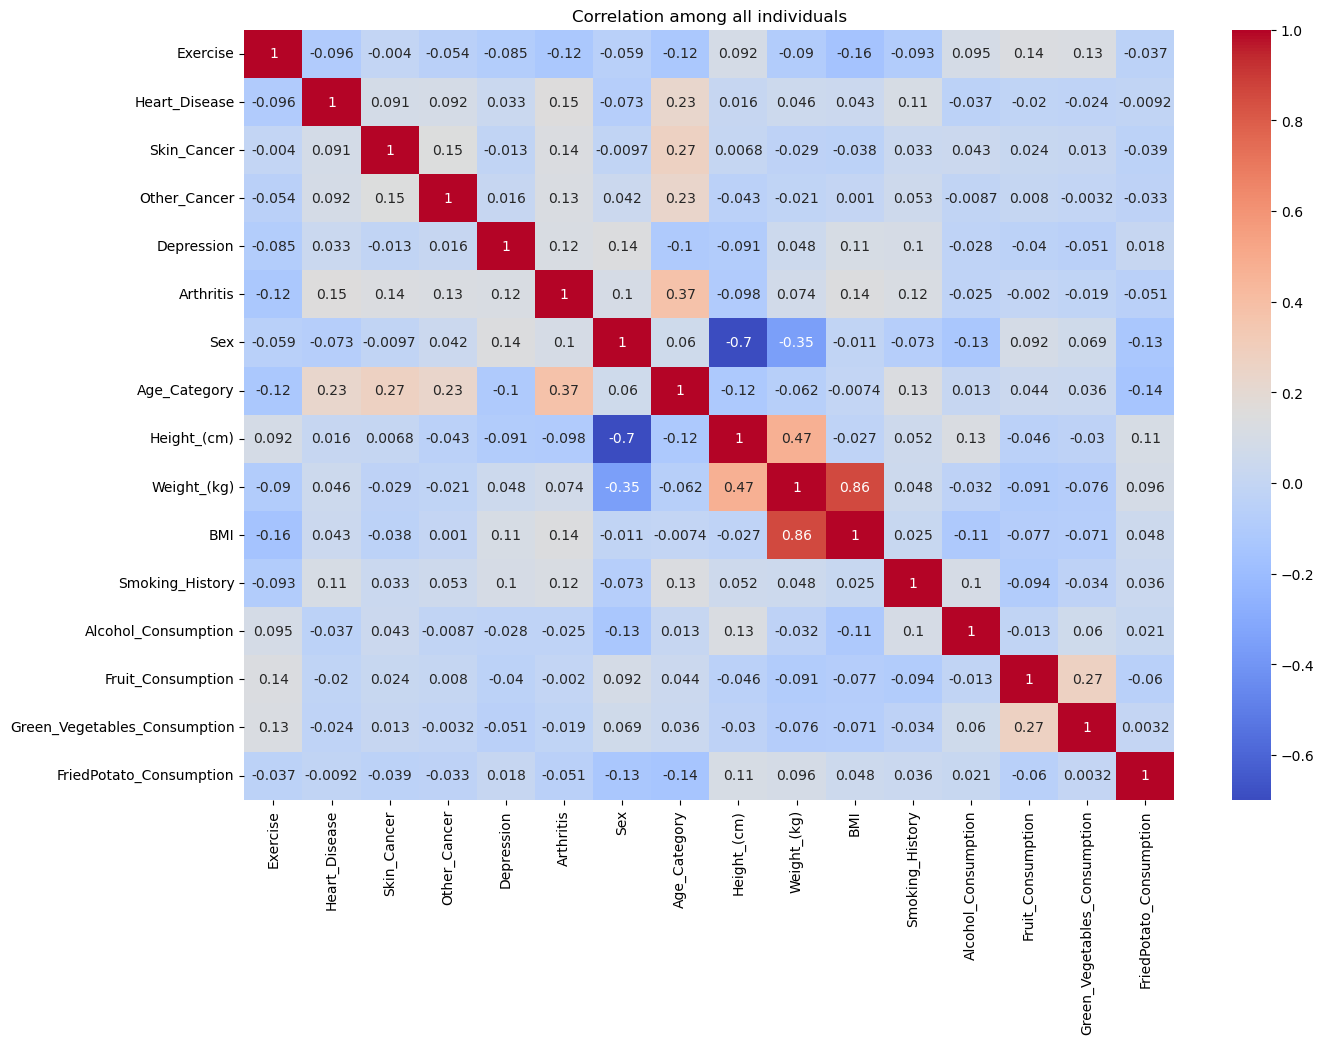

In [32]:
# correlation in all individuals
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Age_Category'] = df['Age_Category'].astype('category')
df['Age_Category'] = df['Age_Category'].cat.codes
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation among all individuals')
plt.savefig('./corr_all.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\xyche\AppData\Local\Temp\ipykernel_22040\1282250773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart.replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\xyche\AppData\Local\Temp\ipykernel_22040\1282250773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart['Sex'] = df_heart['Sex'].map({'Male': 0, 'Female': 1})
C:\Users\xyche\AppData\Local\Temp\ipykernel_22040\1282250773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

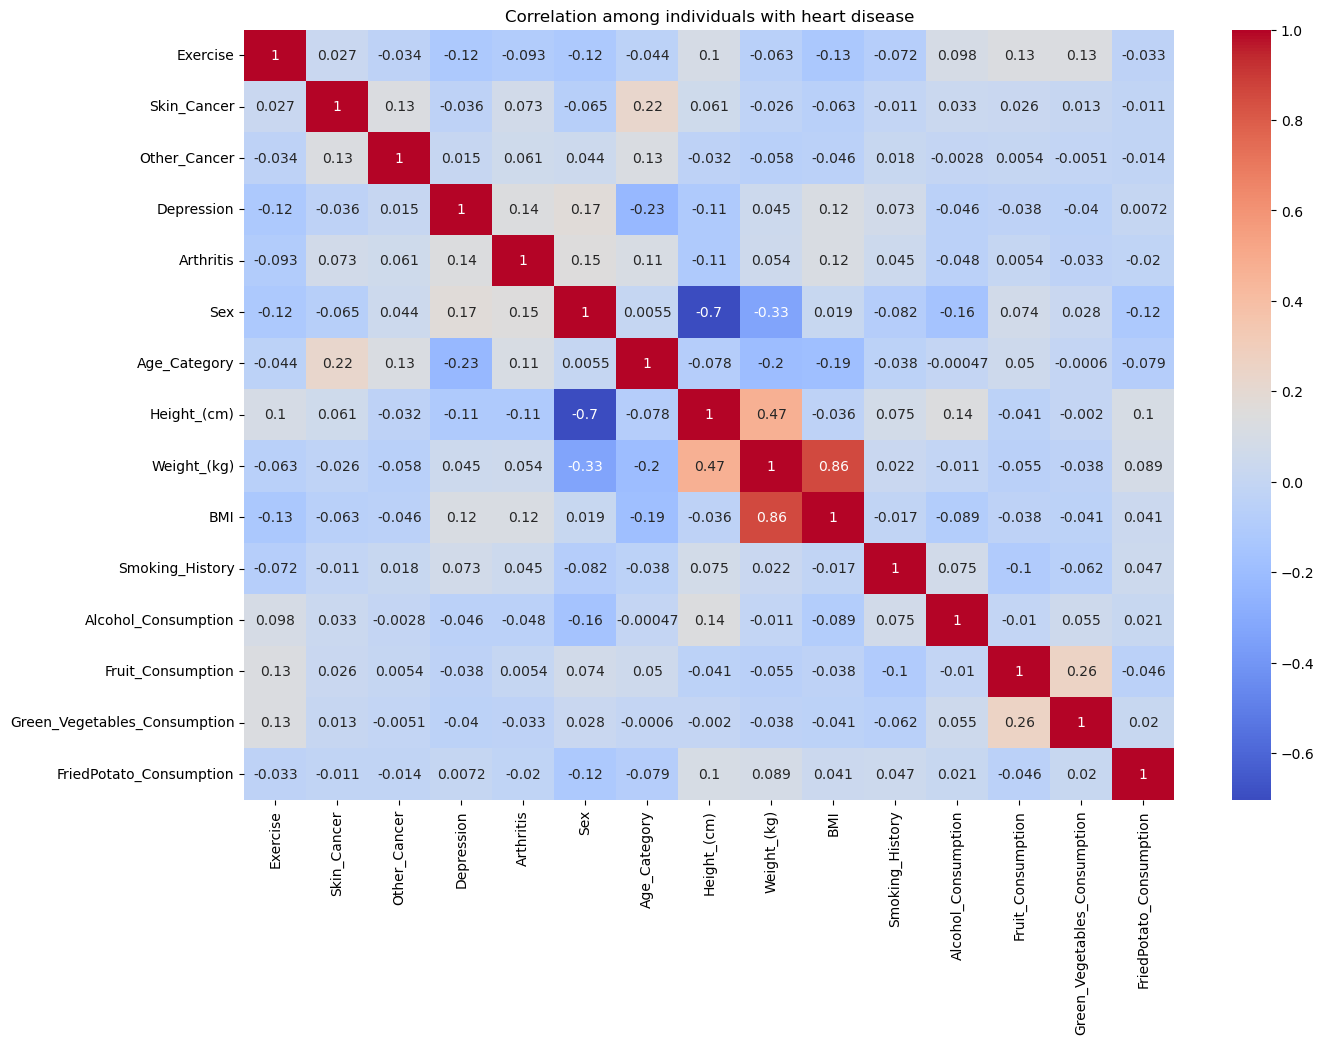

In [33]:
# correlation among individuals with heart disease
df_heart.replace({'Yes': 1, 'No': 0}, inplace=True)
df_heart['Sex'] = df_heart['Sex'].map({'Male': 0, 'Female': 1})
df_heart['Age_Category'] = df_heart['Age_Category'].astype('category')
df_heart['Age_Category'] = df_heart['Age_Category'].cat.codes

correlation_matrix = df_heart.corr()
correlation_matrix = correlation_matrix.drop('Heart_Disease', axis=0)
correlation_matrix = correlation_matrix.drop('Heart_Disease', axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation among individuals with heart disease')
plt.savefig('./corr_heart.png', dpi=400, bbox_inches='tight')
plt.show()
